# Boston Housing dataset price analysis and prediction

##  Machine Learning and Statistics
###  Assignment 2019
#### GMIT Data Analytics


![house banner](https://raw.githubusercontent.com/Osheah/images/master/boston-project/img/housesbanner.png)

Describe

Good summary of the dataset, repository well laid out and organised. Reasonable commits. 20%


## Background

How are housing prices determined? Why is it the average house price in Dublin €432k compared €115k in Longford (An Post and Ordnance Survey Ireland, 2019). There are socio environmental factors that make one property more desirable (hence more expensive) than a comparable property in a different area. Influencing factors could related to the property such as the age of the house, its BER rating or the number of rooms; Or the factors may be related to the local area such as the proximity to work/job opportunity or proximity to good school. The hedonic pricing model aims to capture and quantify these externalities that influence house price. 

The Boston housing dataset was created to investigate factors influencing house price, in particular levels of pollution. It made its first appearance in a paper by Harrison and Rubinfeld (1978) titled *'Hedonic prices and the demand for clean air'* (Harrison & Rubinfeld, 1978). It consisted of 506 observations across 14 measures from regions around Boston, Massachusetts USA. Harrison & Rubinfeld, (1978) developed a hedonic house price index estimator to gauge the marginal maximum price people would pay to have clean air (Belsley, Kuh, & Welsch, 2004). They focused their investigation on if clean air influenced house prices. Harrison and Rubinfeld (1978), collated 13 suspected influencing factors on the 14th measure, price. The factors they considered relevant to house price could be broadly classified as the dependent factor i.e price, structural factors, neighbourhood factors, accessibility factors and air pollution factors. 



The dependent factor MEDV measures the median value of owner occupied houses in the Boston area. It was taken from 1970 census traits. 

The first stage was identifying what exactly the variables represented. This was complicated by the fact that Harrison and Rubinfeld named their data MV, RM, AGE, B, LSTAT, CRIM, ZN, INDUS, TAX, PTRATIO, DIS, RAD, and NOX while Belsley Kuh & Welsch 2004 had similar nomenclature for all their variables bar NOXSQ and LMV but many of the variables were transformed. An examination of Belsley, Kuh and Welsch  data compared to the sklearn data showed that the logarithms taken of the DIS RAD. NOX in Harrison and Rubinfeld was (NOX squared)/1000 in Belsley, Kuh & Welsch; RM was RM squared; B was B/1000. LSTAT was supposed to be the natural log of LSTAT but some other transformation must have also been used as the numbers did not reflect ln or log10 of LSTAT value.    


In [42]:
plt.rcParams['figure.figsize'] = (20, 15)

In [1]:

import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import pandas as pd
import sys
import scipy.stats as ss
import statsmodels.api as sm
from sklearn.datasets import load_boston
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
import plotly.express as px


Using TensorFlow backend.


In [5]:
# IMPORT THE DATA
# from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
#MEDV is stored in target
boston_dataset.target
# Add target to the boston database
boston['MEDV'] = boston_dataset.target
boston.head()
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [40]:

fig = px.parallel_coordinates(boston, color="MEDV", labels=boston.columns,
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2)
fig.show()

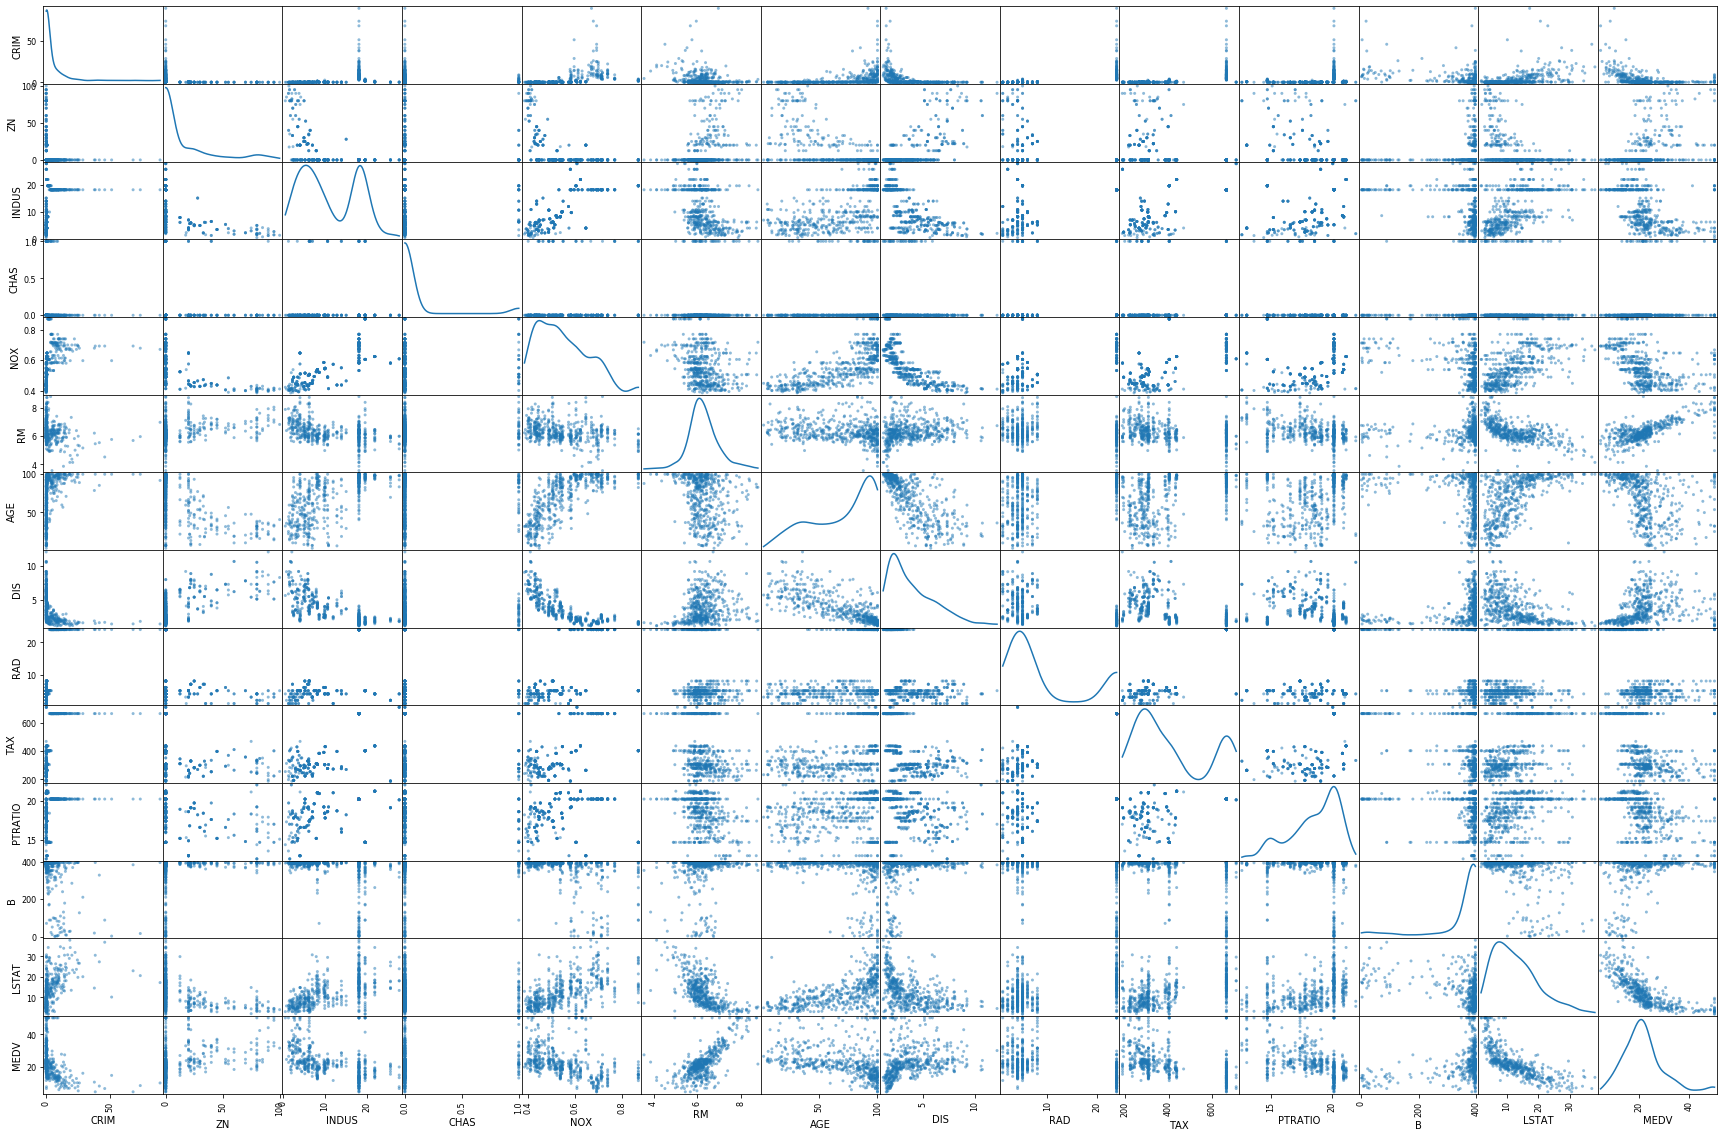

In [17]:
spm = pd.plotting.scatter_matrix(boston, figsize=(30, 20), diagonal='kde')

In [37]:
boston.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


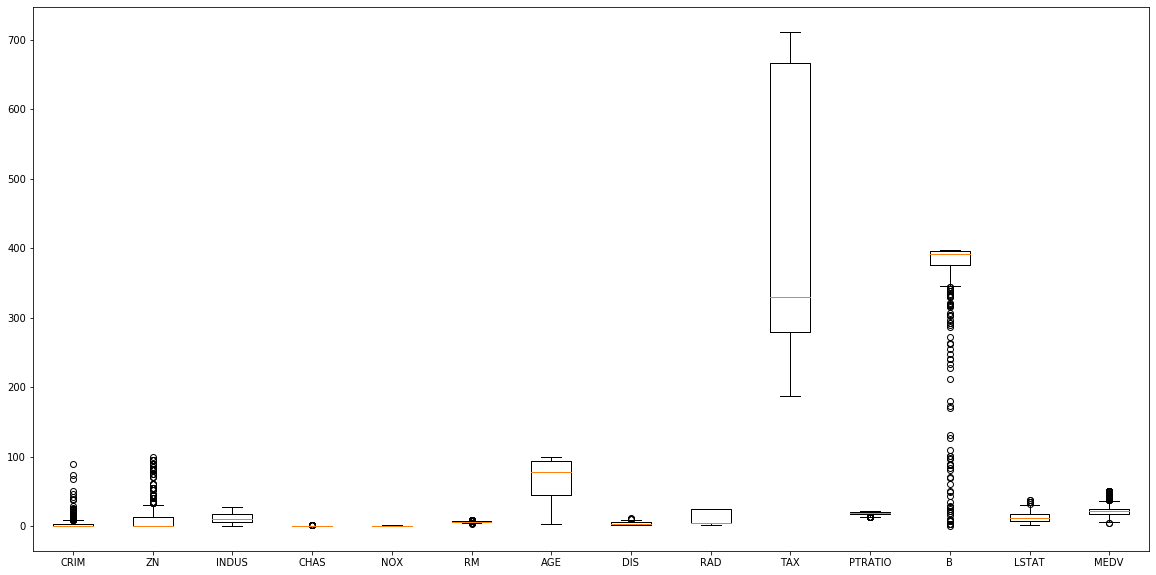

In [50]:
data = [boston.CRIM, boston.ZN, boston.INDUS, boston.CHAS,boston.NOX,
        boston.RM, boston.AGE, boston.DIS, boston.RAD,boston.TAX,
        boston.PTRATIO, boston.B, boston.LSTAT, boston.MEDV]

fig, ax1 = plt.subplots(figsize=(20, 10))
ax1.set_xticklabels(boston.columns)
plt.boxplot(data)

plt.show()


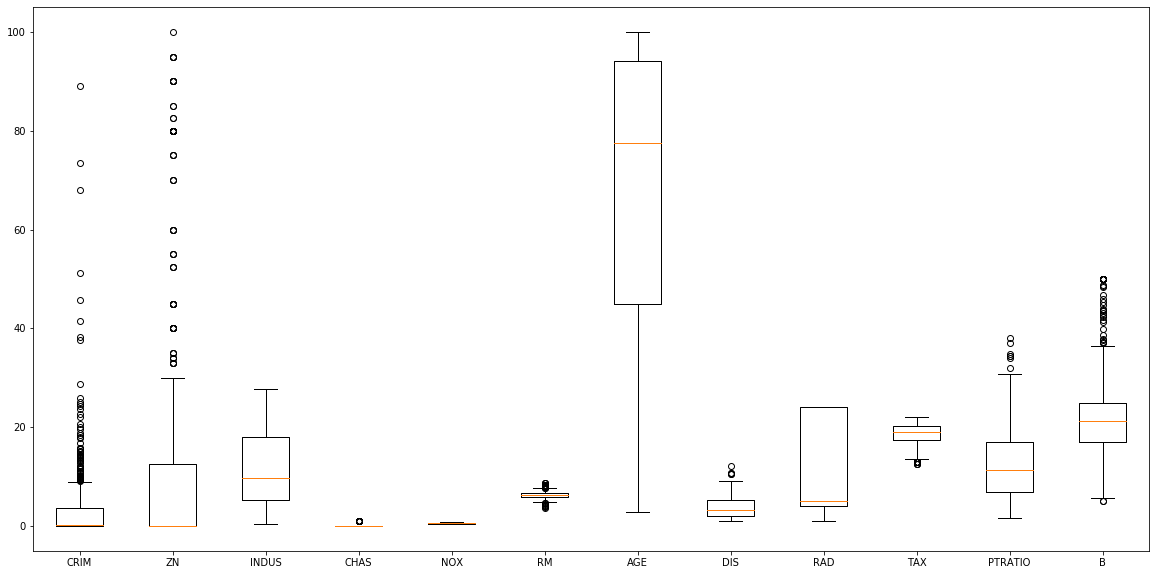

In [51]:
list = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX',
        'RM', 'AGE', 'DIS', 'RAD',
        'PTRATIO', 'LSTAT', 'MEDV']

data = [boston.CRIM, boston.ZN, boston.INDUS, boston.CHAS,boston.NOX,
        boston.RM, boston.AGE, boston.DIS, boston.RAD,
        boston.PTRATIO, boston.LSTAT, boston.MEDV]

fig, ax1 = plt.subplots(figsize=(20, 10))
ax1.set_xticklabels(boston.columns)
plt.boxplot(data)

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

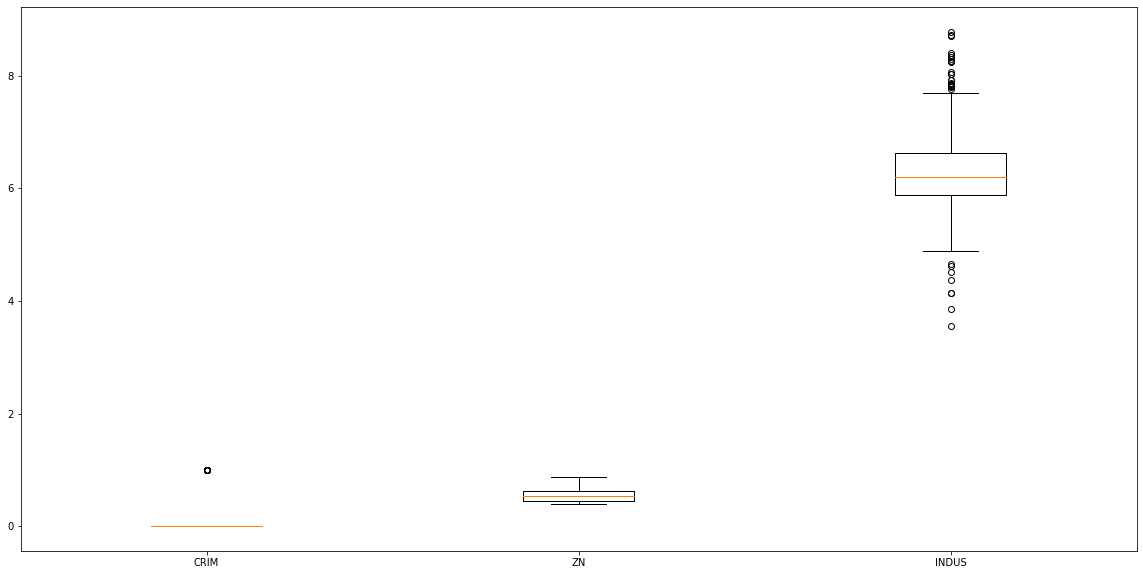

In [65]:
list = ['CHAS','NOX','RM']

data = [boston.CHAS,boston.NOX,boston.RM,]

fig, ax1 = plt.subplots(figsize=(20, 10))
ax1.set_xticklabels(boston.columns)
plt.boxplot(data)

plt.show()

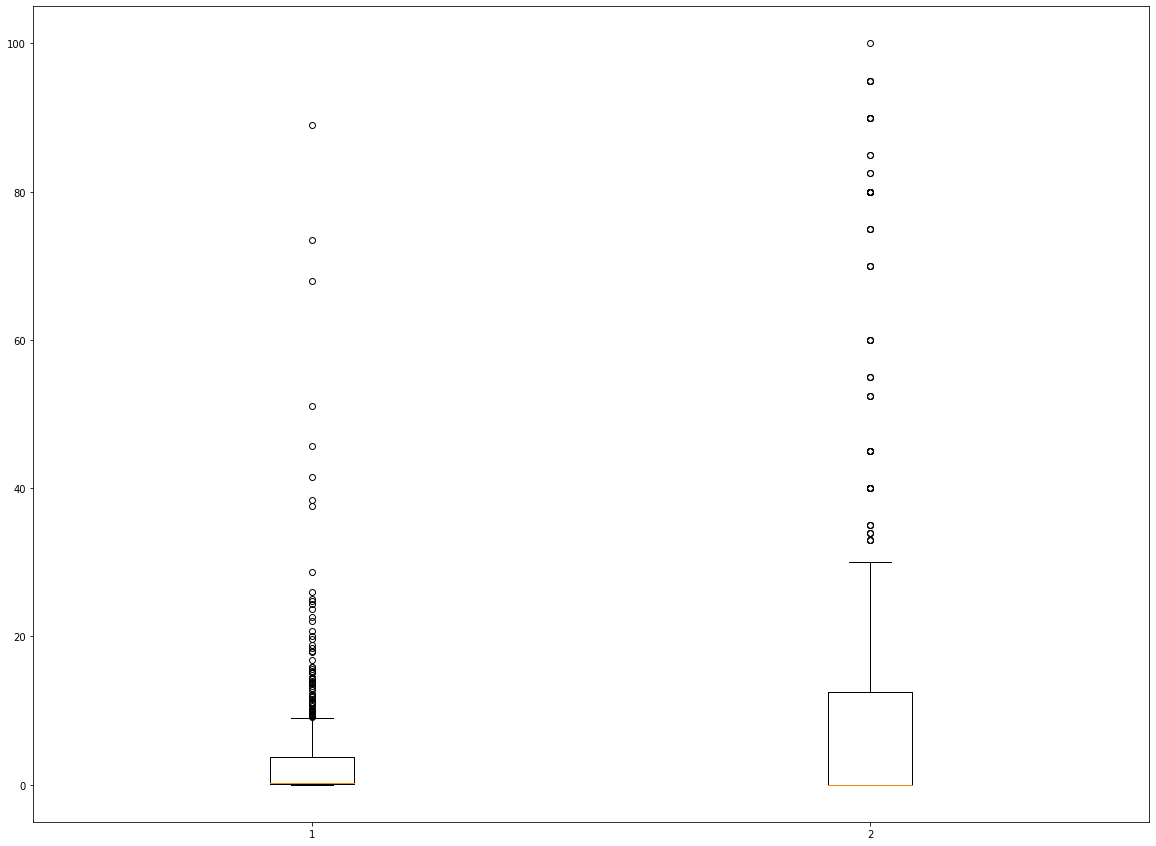

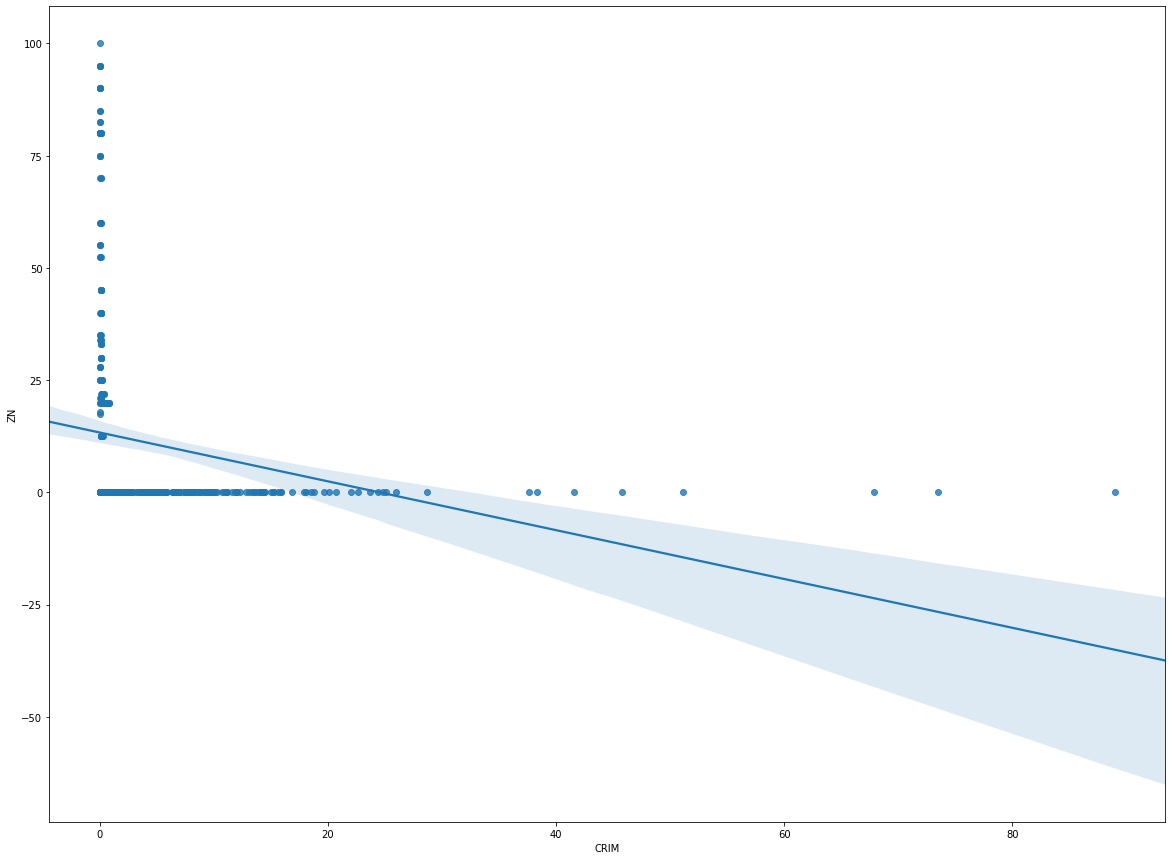

In [69]:
med = boston.ZN.median()
data = [boston.CRIM, boston.ZN]
plt.boxplot(data)
plt.show()

sns.regplot(boston.CRIM, boston.ZN)



## References
1.An Post and Ordnance Survey Ireland. (2019). Geoview Residential Buildings Report [Ebook] (11th ed.). Retrieved from https://www.geodirectory.ie/knowledge-centre/reports-blogs/geoview-residential-issue-11.pdf


https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php

https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

taken from  https://stackoverflow.com/questions/34087126/plot-lower-triangle-in-a-seaborn-pairgrid

https://rstudio-pubs-static.s3.amazonaws.com/364346_811c9012a14847428c9b1fc1e956431a.html


Gilley, O.W., and R. Kelley Pace, On the Harrison and Rubinfeld Data, Journal of Environmental Economics and Management, 31 (1996),403-405. Provided corrections and examined censoring.

Srivastav, V. (2019). Boston Housing - Price Prediction. Retrieved 13 November 2019, from https://rstudio-pubs-static.s3.amazonaws.com/364346_811c9012a14847428c9b1fc1e956431a.html



https://nowosad.github.io/spData/reference/boston.html

#https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

Belsley, D. A., Kuh, E., & Welsch, R. E. (2004). Regression diagnostics: identifying influential data and sources of collinearity. Hoboken, NJ: Wiley. 

Harrison, D., & Rubinfeld, D. L. (1978). Hedonic housing prices and the demand for clean air. Journal of Environmental Economics and Management, 5(1), 81–102. doi: 10.1016/0095-0696(78)90006-2

Härdle, W., & Simar, L. (2007). Applied Multivariate Statistical Analysis (2nd ed.). Berlin: Springer.

StatLib - Datasets Archive. (n.d.). Boston Corrected. Retrieved November 7, 2019, from http://lib.stat.cmu.edu/datasets/boston_corrected.txt.

US Census Bureau. (2018, February 9). 1970 Census of Population and Housing: Census Tracts - Part 23. Retrieved November 12, 2019, from https://www.census.gov/library/publications/1972/dec/phc-1.html. 